# 1.  Data Understanding

##  1.1 Set up background  

### 1.1.1 Import Libraries Modules 
(for data analysis)

In [4]:
# importing data analysis 
import numpy as np
import pandas as pd

In [5]:
# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

# Configure visualisations
%matplotlib inline
mpl.style.use( 'ggplot' )
sns.set_style( 'white' )
pylab.rcParams[ 'figure.figsize' ] = 8 , 6

### 1.1.2 Set up helper Function

In [3]:
def plot_histograms( df , variables , n_rows , n_cols ):
    fig = plt.figure( figsize = ( 16 , 12 ) )
    for i, var_name in enumerate( variables ):
        ax=fig.add_subplot( n_rows , n_cols , i+1 )
        df[ var_name ].hist( bins=10 , ax=ax )
        ax.set_title( 'Skew: ' + str( round( float( df[ var_name ].skew() ) , ) ) ) # + ' ' + var_name ) #var_name+" Distribution")
        ax.set_xticklabels( [] , visible=False )
        ax.set_yticklabels( [] , visible=False )
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()

def plot_distribution( df , var , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , hue=target , aspect=4 , row = row , col = col )
    facet.map( sns.kdeplot , var , shade= True )
    facet.set( xlim=( 0 , df[ var ].max() ) )
    facet.add_legend()

def plot_categories( df , cat , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , row = row , col = col )
    facet.map( sns.barplot , cat , target )
    facet.add_legend()

def plot_correlation_map( df ):
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )

def describe_more( df ):
    var = [] ; l = [] ; t = []
    for x in df:
        var.append( x )
        l.append( len( pd.value_counts( df[ x ] ) ) )
        t.append( df[ x ].dtypes )
    levels = pd.DataFrame( { 'Variable' : var , 'Levels' : l , 'Datatype' : t } )
    levels.sort_values( by = 'Levels' , inplace = True )
    return levels

def plot_variable_importance( X , y ):
    tree = DecisionTreeClassifier( random_state = 99 )
    tree.fit( X , y )
    plot_model_var_imp( tree , X , y )
    
def plot_model_var_imp( model , X , y ):
    imp = pd.DataFrame( 
        model.feature_importances_  , 
        columns = [ 'Importance' ] , 
        index = X.columns 
    )
    imp = imp.sort_values( [ 'Importance' ] , ascending = True )
    imp[ : 10 ].plot( kind = 'barh' )
    print (model.score( X , y ))


## 1.2 Loading data

In [6]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

Variable Description:

> Survived: Survived (1) or died (0)  
> Pclass: Passenger's class  
> Name: Passenger's name  
> Sex: Passenger's sex  
> Age: Passenger's age  
> SibSp: Number of siblings/spouses aboard  
> Parch: Number of parents/children aboard  
> Ticket: Ticket number  
> Fare: Fare  
> Cabin: Cabin  
> Embarked: Port of embarkation  

### + peak the data

In [7]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [8]:
# describe the nurmatic column
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
# describe object type
train_df.describe(include= ['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Allum, Mr. Owen George",male,CA. 2343,B96 B98,S
freq,1,577,7,4,644


## 1.3 Visualizing Data  
+ for observation, so that we can know which should be the predictor

### 1.3.1 For categorical, ordinal or discrete type:  
+ group the x factor, to see the mean of the predict factor
> table  
> boxplot

In [10]:
# use function
def show_mean(x, y):
    return train_df[[x, y]].groupby([x]).mean().sort_values(by = y)

In [11]:
show_mean('Embarked','Survived')

,Survived
Embarked,
S,0.336957
Q,0.389610
C,0.553571


In [12]:
show_mean('Sex','Survived')

,Survived
Sex,
male,0.188908
female,0.742038


In [13]:
show_mean('SibSp','Survived')

,Survived
SibSp,
5,0.000000
8,0.000000
4,0.166667
3,0.250000
0,0.345395
2,0.464286
1,0.535885


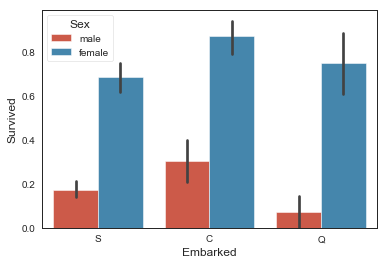

In [14]:
sns.barplot(x = "Embarked", y = "Survived", hue = "Sex", data = train_df)

### 1.3.2 For numerical features:  
+ histogram chart
+ coorelation map

In [15]:
# hist function
def hist_plot(df, x, target, row = 0):
    if row == 0:
        plot_distribution( df , var = x , target = target  )
    else:
        plot_distribution( df , var = x , target = target , row = row )

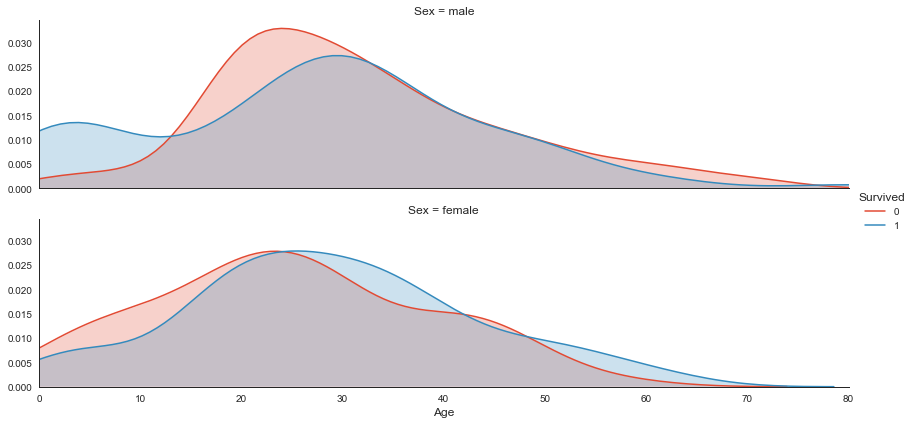

In [16]:
hist_plot(train_df, 'Age', 'Survived', 'Sex')

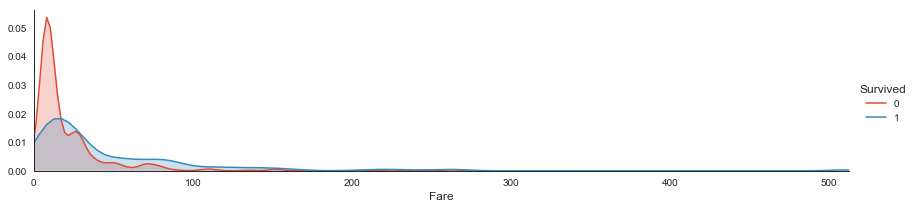

In [17]:
hist_plot(train_df, 'Fare', 'Survived')

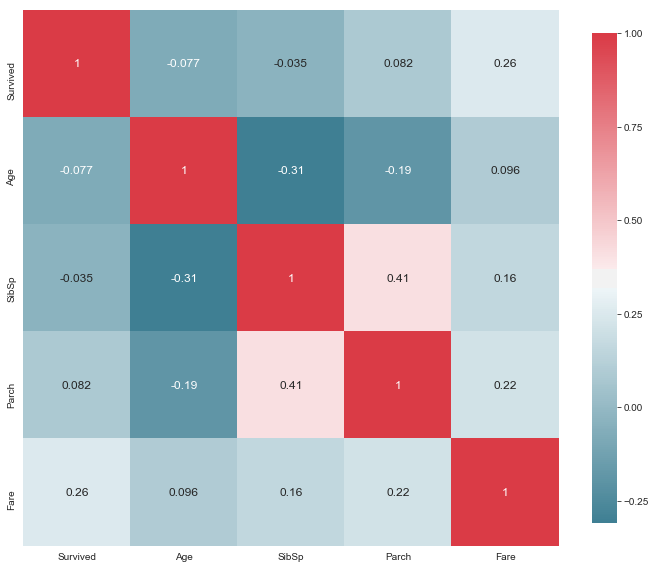

In [18]:
select_feature = ['Survived', 'Age', 'SibSp', 'Parch', 'Fare']
plot_correlation_map( train_df[select_feature] )

 ------

# 2. Wrangle data/ Data preparation

- Write as a function/ or combine two data set and using for loop, so that can apply on train and test set
- Step:   
-- (Dropping features which do not want to including in final analys... to speed up, but not necessary)   
--  Dealing with NA values  
-- Creating new feature (combine, modify some of current features)  
--  Dependands on the ML model wants to apply:  
> Transforming feature (eg. categorical variables > numeric variables, numeric > logical groups....)  

 -- (Dropping data, to make data frame clear, can do this at any point) 

In [83]:
# just reload data againg for easiler restart point
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

## 2.1 Fill miss value

### 2.1.1 Example
+ for Age and Fare  
> keep numerical type:  
> + add features 'Age_fill_mean' and 'Fare_fill_median'   
> 
> transform to category:  
> + add feature 'Age_bin' and 'Fare_bin'  
  
+ for Cabin
> NaN > unknow  

+ for Embarked
> NaN > most common occurance

+ Option 1: Drop the data  
> if the sample size is large  
> be sure that the values are missing at random

+ Option 2: Imputation

> for categorical :   
>> if the miss is a lot, then add another unknow categorical  
>> if only few miss, maybe just add the most common occurance

> for numerical :  
>> mean / median imputation  
>> convert to category 
>> multiple imputation (using multiple regression to imputation this value by other feature)

In [9]:
# use function
def deal_na(df):    
    df['Age_fill'] = df['Age'].fillna(df['Age'].mean())
    df['Fare_fill'] = df['Fare'].fillna(df['Fare'].median())
    
    df['Cabin'] = df['Cabin'].fillna('Unknow')
    
    freq_port = df['Embarked'].dropna().mode()[0]  # get the most common occurance
    df['Embarked'] = df['Embarked'].fillna(freq_port)
    return df

In [10]:
# apply to the data set
train_df = deal_na(train_df)
test_df = deal_na(test_df)

train_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_fill,Fare_fill
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknow,S,22.0,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknow,S,26.0,7.9250


## 2.2 Creating new feature

### 2.2.1 Example of extracting string from a feature and modify it
+ Creating 'Title' feature  
++ extract from 'Name' feature  
++ display now feature by using crosstab function  
++ simplify/ classify the new feature
++ transform feature

In [11]:
# function of creat 'Title' feature
def add_title(df):
    df['Title'] = df.Name.str.extract(' ([A-Za-z]+)\.', expand = False)
    return df

In [12]:
# apply this function on both dataset, and use crosstab to look at the result
train_df = add_title(train_df)
test_df = add_title(test_df)

pd.crosstab(train_df['Title'], train_df['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [13]:
# create function to simply these title (usig replace function)
def title_replace(df):
    df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
     'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    df['Title'] = df['Title'].replace('Mlle', 'Miss')
    df['Title'] = df['Title'].replace('Ms', 'Miss')
    df['Title'] = df['Title'].replace('Mme', 'Mrs')
    
    return df

In [14]:
# apply on both data set and look the resulr
train_df = title_replace(train_df)
test_df = title_replace(test_df)

train_df[['Title', 'Survived']].groupby(['Title']).mean()

,Survived
Title,
Master,0.575000
Miss,0.702703
Mr,0.156673
Mrs,0.793651
Rare,0.347826


+ transform the feature or wait till everything is done then transform with buildin function

In [15]:
# creat a function to convert/ transform the feature
# from categorical to ordinal
def title_convert(df):
    title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
    df['Title_ord'] = df['Title']
    df['Title_ord'] = df['Title_ord'].map(title_mapping)
    df['Title_ord'] = df['Title_ord'].fillna(0)
    return df

In [16]:
# apply to both dataset, look the result
train_df = title_convert(train_df)
test_df = title_convert(test_df)

train_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_fill,Fare_fill,Title,Title_ord
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknow,S,22.0,7.2500,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,71.2833,Mrs,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknow,S,26.0,7.9250,Miss,2


### 2.2.2 Example of combining existing features   
+ create new feature: FamilySize, IsAlone 
> FamilySize: combines Parch and SibSp  
> IsAlone: if FamilySize = 1

In [17]:
# function
def ct_FamilySize(df):
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1 # to count self
    
    df['IsAlone'] = 0
    df.loc[df['FamilySize'] == 1, 'IsAlone'] = 1
    return df

In [18]:
# apply function, display
train_df = ct_FamilySize(train_df)
test_df = ct_FamilySize(test_df)

train_df[['IsAlone', 'Survived']].groupby(['IsAlone']).mean()

,Survived
IsAlone,
0,0.505650
1,0.303538


## 2.3 Dropping

### 2.3.1 Example
Drop 'Name, 'PassengerId' and 'Ticket'  
ps. save the ID for test_set in case needed afterward

In [19]:
test_id = test_df['PassengerId'].copy()

train_df = train_df.drop(['Name', 'PassengerId', 'Ticket'], axis=1)
test_df = test_df.drop(['Name', 'PassengerId', 'Ticket'], axis=1)

In [20]:
train_df.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_fill,Fare_fill,Title,Title_ord,FamilySize,IsAlone
0,0,3,male,22.0,1,0,7.2500,Unknow,S,22.0,7.2500,Mr,1,2,0
1,1,1,female,38.0,1,0,71.2833,C85,C,38.0,71.2833,Mrs,3,2,0
2,1,3,female,26.0,0,0,7.9250,Unknow,S,26.0,7.9250,Miss,2,1,1


In [21]:
test_id[:5]

0    892
1    893
2    894
3    895
4    896
Name: PassengerId, dtype: int64

## 2.4 Transform Data

Depend on what kind of ML want to use

### 2.4.1 Example 

+ create another sets of data and all the feature in it are category variable  
> Age as: 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior'  
> Fare as: '1_quartile', '2_quartile', '3_quartile', '4_quartile'  

In [22]:
# functions
def simplify_ages(df, col_name):
    bins = (min(df[col_name])-1, 5, 12, 18, 25, 35, 60,  max(df[col_name]))
    group_names = ['Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
    categories = pd.cut(df[col_name], bins, labels = group_names)
    df[col_name] = categories
    return df

def simplify_fare(df, col_name):
    bins = (min(df[col_name])-1, 8, 15, 31,  max(df[col_name]))
    group_names = ['1_quartile', '2_quartile', '3_quartile', '4_quartile']
    categories = pd.cut(df[col_name], bins, labels = group_names)
    df[col_name] = categories
    return df

def simpify_familysize(df, col_name):
    bins = (0,1.5, 4, max(df[col_name]))
    group_names = ['Single', 'Small', 'Large']
    categories = pd.cut(df[col_name], bins, labels = group_names)
    df[col_name] = categories
    return df

# create new data set and apply them with the function above
def ct_category_df(df):
    try:
        select_col = ['Survived', 'Pclass','Sex','Age_fill','Fare_fill','Embarked','Title', 'IsAlone']
        new_df = df[select_col].copy()
    except:
        select_col = ['Pclass','Sex','Age_fill','Fare_fill','Embarked','Title', 'IsAlone']
        new_df = df[select_col].copy()
    new_df = new_df.rename(columns = {'Age_fill': 'Age', 'Fare_fill': 'Fare'})
    return new_df

# main function
def transform_features(df):
    new_df = ct_category_df(df)
    new_df = simplify_ages(new_df, 'Age')
    new_df = simplify_fare(new_df, "Fare")
    #new_df = simpify_familysize(new_df, 'FamilySize')
    return new_df

In [23]:
category_train_df = transform_features(train_df)
category_test_df = transform_features(test_df)

# now all the features are category typy
category_train_df.head(3)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,male,Student,1_quartile,S,Mr,0
1,1,1,female,Adult,4_quartile,C,Mrs,0
2,1,3,female,Young Adult,1_quartile,S,Miss,1


+ Final Encoding
> The last part of the preprocessing phase is to normalize labels.  
> The LabelEncoder in Scikit-learn will convert each unique string value into a number, making out data more flexible for various algorithms.

In [24]:
from sklearn import preprocessing

def encode_features(df):
    features = ['Sex','Age', 'Fare', 'Embarked', 'Title']
    df_temp = df[features].copy()
    
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(df_temp[feature])
        df[feature] = le.transform(df[feature])
    return df

In [25]:
# apply the function
category_train_df = encode_features(category_train_df)
category_test_df = encode_features(category_test_df)

In [26]:
# look at result
category_train_df.head(3)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,1,4,0,2,2,0
1,1,1,0,0,3,0,3,0
2,1,3,0,6,0,2,1,1


In [27]:
category_test_df.head(3)

,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,3,1,6,0,1,2,1
1,3,0,0,0,2,3,0
2,2,1,3,1,1,2,1


  ------

# 3. Modeling and Prediction

In [29]:
# importing ML modules
# Modelling Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
from sklearn.linear_model import Perceptron,SGDClassifier

# Modelling Helpers
from sklearn.preprocessing import Imputer , Normalizer , scale
from sklearn.model_selection import train_test_split
from sklearn.cross_validation import KFold
from sklearn.feature_selection import RFECV
from sklearn.metrics import make_scorer, accuracy_score

C:\Users\ru04r\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## 3.1 Splitting up the Training Data

1. Separate the features (x) form the labels (y)
2. Splitting validation and training data

In [30]:
x_all = category_train_df.drop(['Survived'], axis = 1)
y_all = category_train_df['Survived']

# split 20% of the validataion, 80% of the training data
num_test = 0.20 
x_train, x_valid, y_train, y_valid = train_test_split(x_all, y_all, test_size = num_test)
x_test = category_test_df

In [31]:
# check the shape of each data set
print(x_all.shape, y_all.shape)
print(x_train.shape, x_valid.shape, y_train.shape, y_valid.shape, x_test.shape)

(891, 7) (891,)
(712, 7) (179, 7) (712,) (179,) (418, 7)


## 3.2 Select Model

According to the data:
> type of the feature  
> n of the data point 

http://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

Example of this Titanic data set:

- a classification and regression problem, output (Survived or not)
- it's a supervised learning

- the model we can use:
>Logistic Regression  
KNN or k-Nearest Neighbors  
Support Vector Machines  
Gaussian Naive Bayes classifier  
Decision Tree  
Random Forest  
Perceptron  

there might be more, but the basic of code using sklearn is the same


### 3.2.0 Code for ML

Steps to follow:
    (see the example from 3.2.1)

1. Create a object contain the model choosen:   
     name a variable and assign the choosen model for it:         

In [ ]:
My_model = LogisticRegression()

2. Fit the model with training data

In [ ]:
My_model.fit(x_train, y_train)

3. Using validateion set to check the performance: write in to function
    + acc_valid = round(My_model.score(x_valid_set, y_valid_set)*100, 2)  
    + acc_train = round(My_model.score(x_train_set, y_train_set)*100, 2)  
    or 
    + y_train_pred = logreg.predict(x_train)  
    + y_valid_pred = logreg.predict(x_valid)  
    
    + acc_log_train = accuracy_score(y_train, y_train_pred)  
    + acc_log_valid = accuracy_score(y_valid, y_valid_pred)  

In [129]:
def acc_check(model, x_train, y_train, x_valid, y_valid):
    y_train_pred = model.predict(x_train)
    y_valid_pred = model.predict(x_valid)

    acc_log_train = accuracy_score(y_train, y_train_pred)
    acc_log_valid = accuracy_score(y_valid, y_valid_pred)
    
    # print out accuracy
    print('accuracy for training set: {}'.format(acc_log_train))
    print('accuracy for validation set: {}'.format(acc_log_valid))
    return acc_log_train, acc_log_valid

4. Validate with KFold (write in a function)

In [186]:
def run_kfold(model, x_all, y_all, n_folds = 10, print_each = False, print_head = 3):
    kf = KFold(len(y_all), n_folds)
    outcomes = []
    fold = 0
    for train_index, test_index in kf:
        fold += 1
        x_train, x_test = x_all.values[train_index], x_all.values[test_index]
        y_train, y_test = y_all.values[train_index], y_all.values[test_index]
        model.fit(x_train, y_train)
        predictions = model.predict(x_test)
        accuracy = accuracy_score(y_test, predictions)
        outcomes.append(accuracy)
        if print_each:
            print("Fold {} accuracy: {}".format(fold, accuracy))
    mean_outcome = np.mean(outcomes)
    print(outcomes[:print_head])
    print("Mean Accuracy: {}".format(mean_outcome))
    return mean_outcome

5. Predict the model with test data (write in a function)  
will return a dataframe with ID and predicted value

In [132]:
def model_pred(model, x_test, y_ID):
    prediction = model.predict(x_test)
    output = pd.DataFrame({'ID' : y_ID, 'Survived': prediction})
    return output

### 3.2.1 Logistic Regression
Logistic regression measures the relationship between the categorical dependent variable (feature) and one or more independent variables (features) by estimating probabilities using a logistic function, which is the cumulative logistic distribution.  
        
Reference Wikipedia: https://en.wikipedia.org/wiki/Logistic_regression

In [146]:
# Logistic Regression

# 1. assign the model
LogReg = LogisticRegression()

# 2. fit the model
LogReg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [148]:
# 3. check the accuracy
acc_Log_train, acc_Log_valid = acc_check(LogReg, x_train, y_train, x_valid, y_valid)

accuracy for training set: 0.800561797752809
accuracy for validation set: 0.7318435754189944


In [187]:
# 4. validate with KFold
mean_Log_kfold = run_kfold(LogReg, x_all, y_all)

[0.7888888888888889, 0.797752808988764, 0.7640449438202247]
Mean Accuracy: 0.7788888888888889


In [150]:
# 5. predict the model with test data
pred_Log_df = model_pred(LogReg, x_test, test_id)
pred_Log_df.head()

,ID,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


### 3.2.2 KNN or k-Nearest Neighbors

In pattern recognition, the k-Nearest Neighbors algorithm (or k-NN for short) is a non-parametric method used for classification and regression. A sample is classified by a majority vote of its neighbors, with the sample being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor.  

Reference Wikipedia: https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm

In [151]:
# name the model
KNN = KNeighborsClassifier(n_neighbors = 3)

# fit the model
KNN.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [152]:
# check accuracy
acc_KNN_train, acc_KNN_valid = acc_check(KNN, x_train, y_train, x_valid, y_valid)

accuracy for training set: 0.851123595505618
accuracy for validation set: 0.776536312849162


In [188]:
# valide with kfold
mean_KNN_kfold = run_kfold(KNN, x_all, y_all)

[0.7111111111111111, 0.7752808988764045, 0.7191011235955056]
Mean Accuracy: 0.7845942571785268


In [154]:
# predict
pred_KNN_df = model_pred(KNN, x_test, test_id)
pred_KNN_df.head()

,ID,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


### 3.2.3 SVM (Support Vector Machines)

Support Vector Machines are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis. Given a set of training samples, each marked as belonging to one or the other of two categories, an SVM training algorithm builds a model that assigns new test samples to one category or the other, making it a non-probabilistic binary linear classifier. 

Reference Wikipedia: https://en.wikipedia.org/wiki/Support_vector_machine

In [155]:
# name model
SVM = SVC()

# fit model
SVM.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [156]:
# accoracy of the model
acc_SVM_train, acc_SVM_valid = acc_check(SVM, x_train, y_train, x_valid, y_valid)

accuracy for training set: 0.8412921348314607
accuracy for validation set: 0.7597765363128491


In [189]:
# valide kfold
mean_SVM_kfold = run_kfold(SVM, x_all, y_all)

[0.8222222222222222, 0.8764044943820225, 0.7752808988764045]
Mean Accuracy: 0.8260424469413232


In [158]:
# predict
pred_SVM_df = model_pred(SVM, x_test, test_id)
pred_SVM_df.head()

,ID,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


### 3.2.4 Gaussian Naive Bayes classifier

In machine learning, naive Bayes classifiers are a family of simple probabilistic classifiers based on applying Bayes' theorem with strong (naive) independence assumptions between the features. Naive Bayes classifiers are highly scalable, requiring a number of parameters linear in the number of variables (features) in a learning problem.

Reference Wikipedia: https://en.wikipedia.org/wiki/Naive_Bayes_classifier

In [159]:
GauNB = GaussianNB()
GauNB.fit(x_train, y_train)

GaussianNB(priors=None)

In [160]:
acc_GauNB_train, acc_GauNB_valid = acc_check(GauNB, x_train, y_train, x_valid, y_valid)

accuracy for training set: 0.7823033707865169
accuracy for validation set: 0.7150837988826816


In [190]:
mean_GauNB_kfold = run_kfold(GauNB, x_all, y_all)

[0.6555555555555556, 0.6629213483146067, 0.7865168539325843]
Mean Accuracy: 0.7509488139825219


In [162]:
pred_GauNB_df = model_pred(GauNB, x_test, test_id)
pred_GauNB_df.head()

,ID,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


### 3.2.5 Decision Tree

This model uses a decision tree as a predictive model which maps features (tree branches) to conclusions about the target value (tree leaves). Tree models where the target variable can take a finite set of values are called classification trees; in these tree structures, leaves represent class labels and branches represent conjunctions of features that lead to those class labels. Decision trees where the target variable can take continuous values (typically real numbers) are called regression trees. 

Reference Wikipedia: https://en.wikipedia.org/wiki/Decision_tree_learning

In [175]:
DescisionTree = DecisionTreeClassifier()
DescisionTree.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [176]:
acc_DescisionTree_train, acc_DescisionTree_valid = acc_check(DescisionTree, x_train, y_train, x_valid, y_valid)

accuracy for training set: 0.8848314606741573
accuracy for validation set: 0.7653631284916201


In [191]:
mean_DescisionTree_kfold = run_kfold(DescisionTree, x_all, y_all)

[0.7333333333333333, 0.8202247191011236, 0.7415730337078652]
Mean Accuracy: 0.8025468164794007


In [178]:
pred_DescisionTree_df = model_pred(DescisionTree, x_test, test_id)
pred_DescisionTree_df.head()

,ID,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


### 3.2.6 Random Forest

Random Forests is one of the most popular. Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks, that operate by constructing a multitude of decision trees (n_estimators=100) at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. 

Reference Wikipedia: https://en.wikipedia.org/wiki/Random_forest

In [179]:
Random_Forest = RandomForestClassifier(n_estimators=100)
Random_Forest.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [180]:
acc_Random_Forest_train, acc_Random_Forest_valid = acc_check(Random_Forest, x_train, y_train, x_valid, y_valid)

accuracy for training set: 0.8848314606741573
accuracy for validation set: 0.7541899441340782


In [198]:
mean_Random_Forest_kfold = run_kfold(Random_Forest, x_all, y_all)

[0.7222222222222222, 0.8426966292134831, 0.7752808988764045]
Mean Accuracy: 0.8093008739076154


In [182]:
pred_Random_Forest_df = model_pred(Random_Forest, x_test, test_id)
pred_Random_Forest_df.head()

,ID,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


### 3.2.7 Perceptron

The perceptron is an algorithm for supervised learning of binary classifiers (functions that can decide whether an input, represented by a vector of numbers, belongs to some specific class or not). It is a type of linear classifier, i.e. a classification algorithm that makes its predictions based on a linear predictor function combining a set of weights with the feature vector. The algorithm allows for online learning, in that it processes elements in the training set one at a time. 

Reference Wikipedia: https://en.wikipedia.org/wiki/Perceptron

In [171]:
Pcptron = Perceptron()
Pcptron.fit(x_train, y_train)

C:\Users\ru04r\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Perceptron(alpha=0.0001, class_weight=None, eta0=1.0, fit_intercept=True,
      max_iter=None, n_iter=None, n_jobs=1, penalty=None, random_state=0,
      shuffle=True, tol=None, verbose=0, warm_start=False)

In [172]:
acc_Pcptron_train, acc_Pcptron_valid = acc_check(Pcptron, x_train, y_train, x_valid, y_valid)

accuracy for training set: 0.7808988764044944
accuracy for validation set: 0.7206703910614525


In [193]:
mean_Pcptron_kfold = run_kfold(Pcptron, x_all, y_all)

[0.6444444444444445, 0.5955056179775281, 0.7415730337078652]
Mean Accuracy: 0.6138826466916354


C:\Users\ru04r\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.perceptron.Perceptron'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [174]:
pred_Pcptron_df = model_pred(Pcptron, x_test, test_id)
pred_Pcptron_df.head()

,ID,Survived
0,892,1
1,893,1
2,894,1
3,895,1
4,896,1


## 3.3 Model comparsion/ evaluation

Rank the evaluation of all the models to choose the best one for our problem.  
As usual, use a dataframe to show the camparsion 

In [199]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'SVM', 'Naive Bayes', 'Decision Tree', 'Random Forest', 'Perceptron'],
    'train_Score': [acc_Log_train, acc_KNN_train, acc_SVM_train, acc_GauNB_train, 
                    acc_DescisionTree_train, acc_Random_Forest_train, acc_Pcptron_train],
    'valid_Score':[acc_Log_valid, acc_KNN_valid, acc_SVM_valid, acc_GauNB_valid, 
                    acc_DescisionTree_valid, acc_Random_Forest_valid, acc_Pcptron_valid],
    'mean_valid': [mean_Log_kfold, mean_KNN_kfold, mean_SVM_kfold, mean_GauNB_kfold,
                   mean_DescisionTree_kfold, mean_Random_Forest_kfold ,mean_Pcptron_kfold]
})

In [200]:
models.sort_values(by = 'mean_valid')

,Model,train_Score,valid_Score,mean_valid
6,Perceptron,0.780899,0.720670,0.613883
3,Naive Bayes,0.782303,0.715084,0.750949
0,Logistic Regression,0.800562,0.731844,0.778889
1,KNN,0.851124,0.776536,0.784594
4,Decision Tree,0.884831,0.765363,0.802547
5,Random Forest,0.884831,0.754190,0.809301
2,SVM,0.841292,0.759777,0.826042


# 4. Output to csv

Base on the result above, chose the best model's outcome  
Adjuest the column name  
Write into csv  

In [203]:
output = pred_SVM_df.copy()
output = output.rename(columns = {'ID': 'PassengerId'} )
output.head(3)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0


In [204]:
output.to_csv('titanic_pred.csv', index = False)

------

# 5. Using Keras to executive deep learning

https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/  
https://machinelearningmastery.com/5-step-life-cycle-neural-network-models-keras/

## 5.1 Import Keras

In [1]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [32]:
# random seed
np.random.seed(7)

+ The data set we have:
> x_all, y_all : all the training data  
> x_train, y_train : 80% of the training data  
> x_valid, y_valid : 20% of the training data  
> x_test (test_id) : data for predict

In [33]:
x_all.head(3)

,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,3,1,4,0,2,2,0
1,1,0,0,3,0,3,0
2,3,0,6,0,2,1,1


## 5.2 Define Model

Create a Sequential model and add layers one at a time until we are happy with our network topology.  
    
+ creating the first layer 
> with the 'input_dim' argument and setting it to n for the n input variables
> + in this example, we have 7 inputs
    
+ the number of layers and their types?
> there are heuristics that we can use and often the best network structure is found through a process of trial and error experimentation.
> + in this example, we will use a fully-connected network structure with three layers.

+ connected layers are defined using the Dense class
> specify the number of neurons in the layer as the first argument,   
> the initialization method as the second argument as 'init'   
> specify the activation function using the 'activation' argument
> + in this example, we use the rectifier (‘relu‘) activation function on the first two layers and the sigmoid function in the output layer.

In [34]:
# create model
model = Sequential()
model.add(Dense(12, input_dim = 7, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

## 5.3 Compile Model

Compiling the model uses the efficient numerical libraries under the covers (the so-called backend) such as Theano or TensorFlow. The backend automatically chooses the best way to represent the network for training and making predictions to run on your hardware, such as CPU or GPU or even distributed.  
    
When compiling, we must specify some additional properties required when training the network.

+ elements needs to be specified  
> loss function : to use to evaluate a set of weights   
> optimizer : used to search through different weights for the network   
> optional metrics :  to collect and report during training  


> + in this case:
>> we use logarithmic loss: which for a binary classification problem is defined in Keras as “binary_crossentropy“  
>> use the efficient gradient descent algorithm “adam” for no other reason that it is an efficient default.  
>> collect and report the classification accuracy as the metric

In [35]:
# Complie model
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

## 5.4 Fit Model

We can train or fit our model on our loaded data by calling the fit() function on the model.
+ arguments:
> nepochs: number of iterations  
> batch_size: the number of instances that are evaluated before a weight update


+ Note: If you try running this example in an IPython or Jupyter notebook you may get an error. The reason is the output progress bars during training. You can easily turn these off by setting verbose=0 in the call to model.fit().

In [36]:
# Fit the model
model.fit(x_train, y_train, epochs = 500, batch_size = 10)

Epoch 1/500
712/712 [==============================] - 1s 2ms/step - loss: 0.6529 - acc: 0.6166
Epoch 2/500
712/712 [==============================] - 0s 97us/step - loss: 0.6237 - acc: 0.6208
Epoch 3/500
712/712 [==============================] - 0s 112us/step - loss: 0.5956 - acc: 0.6390
Epoch 4/500
712/712 [==============================] - 0s 67us/step - loss: 0.5795 - acc: 0.6728
Epoch 5/500
712/712 [==============================] - 0s 98us/step - loss: 0.5681 - acc: 0.7065
Epoch 6/500
712/712 [==============================] - 0s 95us/step - loss: 0.5590 - acc: 0.7219
Epoch 7/500
712/712 [==============================] - 0s 77us/step - loss: 0.5512 - acc: 0.7458
Epoch 8/500
712/712 [==============================] - 0s 98us/step - loss: 0.5434 - acc: 0.7303
Epoch 9/500
712/712 [==============================] - 0s 69us/step - loss: 0.5358 - acc: 0.7500
Epoch 10/500
712/712 [==============================] - 0s 69us/step - loss: 0.5299 - acc: 0.7542
Epoch 11/500
712/712 [=======

712/712 [==============================] - 0s 104us/step - loss: 0.3909 - acc: 0.8385
Epoch 167/500
712/712 [==============================] - 0s 69us/step - loss: 0.3886 - acc: 0.8357
Epoch 168/500
712/712 [==============================] - 0s 115us/step - loss: 0.3899 - acc: 0.8427
Epoch 169/500
712/712 [==============================] - 0s 95us/step - loss: 0.3909 - acc: 0.8371
Epoch 170/500
712/712 [==============================] - 0s 102us/step - loss: 0.3911 - acc: 0.8315
Epoch 171/500
712/712 [==============================] - 0s 71us/step - loss: 0.3905 - acc: 0.8385
Epoch 172/500
712/712 [==============================] - 0s 162us/step - loss: 0.3893 - acc: 0.8469
Epoch 173/500
712/712 [==============================] - 0s 73us/step - loss: 0.3901 - acc: 0.8413
Epoch 174/500
712/712 [==============================] - 0s 70us/step - loss: 0.3907 - acc: 0.8441
Epoch 175/500
712/712 [==============================] - 0s 71us/step - loss: 0.3907 - acc: 0.8357
Epoch 176/500
712/71

712/712 [==============================] - 0s 95us/step - loss: 0.3752 - acc: 0.8343
Epoch 331/500
712/712 [==============================] - 0s 67us/step - loss: 0.3722 - acc: 0.8385
Epoch 332/500
712/712 [==============================] - 0s 101us/step - loss: 0.3763 - acc: 0.8399
Epoch 333/500
712/712 [==============================] - 0s 112us/step - loss: 0.3734 - acc: 0.8385
Epoch 334/500
712/712 [==============================] - 0s 104us/step - loss: 0.3745 - acc: 0.8371
Epoch 335/500
712/712 [==============================] - 0s 90us/step - loss: 0.3747 - acc: 0.8427
Epoch 336/500
712/712 [==============================] - 0s 91us/step - loss: 0.3737 - acc: 0.8413
Epoch 337/500
712/712 [==============================] - 0s 70us/step - loss: 0.3762 - acc: 0.8441
Epoch 338/500
712/712 [==============================] - 0s 71us/step - loss: 0.3736 - acc: 0.8413
Epoch 339/500
712/712 [==============================] - 0s 80us/step - loss: 0.3752 - acc: 0.8469
Epoch 340/500
712/712

712/712 [==============================] - 0s 90us/step - loss: 0.3547 - acc: 0.8525
Epoch 495/500
712/712 [==============================] - 0s 106us/step - loss: 0.3596 - acc: 0.8441
Epoch 496/500
712/712 [==============================] - 0s 70us/step - loss: 0.3528 - acc: 0.8441
Epoch 497/500
712/712 [==============================] - 0s 126us/step - loss: 0.3577 - acc: 0.8427
Epoch 498/500
712/712 [==============================] - 0s 91us/step - loss: 0.3647 - acc: 0.8371
Epoch 499/500
712/712 [==============================] - 0s 77us/step - loss: 0.3578 - acc: 0.8441
Epoch 500/500
712/712 [==============================] - 0s 94us/step - loss: 0.3586 - acc: 0.8413


## 5.5 Evaluate Model

evaluate your model using the evaluate() function 

In [38]:
# evaluate the model
scores = model.evaluate(x_valid, y_valid)

179/179 [==============================] - 0s 351us/step


In [42]:
def run_nn_kfold(model, x_all, y_all, n_folds = 10, print_each = False, print_head = 3):
    kf = KFold(len(y_all), n_folds)
    outcomes = []
    fold = 0
    for train_index, test_index in kf:
        fold += 1
        x_train, x_test = x_all.values[train_index], x_all.values[test_index]
        y_train, y_test = y_all.values[train_index], y_all.values[test_index]
        scores = model.evaluate(x_train, y_train)
        outcomes.append(scores[1])
        if print_each:
            print("Fold {} accuracy: {}".format(fold, scores[1]))
    mean_outcome = np.mean(outcomes)
    print(outcomes[:print_head])
    print("Mean Accuracy: {}".format(mean_outcome))
    return mean_outcome

In [43]:
run_nn_kfold(model, x_all, y_all)

802/802 [==============================] - 0s 26us/step
[0.8439450686641697, 0.8366583541147132, 0.8491271820448878]
Mean Accuracy: 0.8428733098589356


0.8428733098589356

## 5.6 Make Predictions

calling model.predict()

In [59]:
def model_pred(model, x_test, y_ID):
    prediction = model.predict(x_test)
    prediction = [int(round(x[0])) for x in prediction]
    output = pd.DataFrame({'ID' : y_ID, 'Survived': prediction})
    return output

In [60]:
# calculate predictions
pred_nn_df = model_pred(model, x_test, test_id)
pred_nn_df.head()

,ID,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


## 5.7 Output

In [61]:
output = pred_nn_df.copy()
output = output.rename(columns = {'ID': 'PassengerId'} )
output.head(3)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0


In [62]:
output.to_csv('titanic_nn_pred.csv', index = False)